# Titanic

In [ ]:
# Leitura dos csv's
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("train.csv")
df_test = pd.read_csv('test.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Goodwin, Master. Harold Victor",male,1601,G6,S
freq,1,577,7,4,644


In [ ]:
# Porcentagem de dados faltantes
for feature in df.columns:
    print(f"{feature}: {df[feature].isnull().sum()/df.shape[0]:.3f}")

PassengerId: 0.000
Survived: 0.000
Pclass: 0.000
Name: 0.000
Sex: 0.000
Age: 0.199
SibSp: 0.000
Parch: 0.000
Ticket: 0.000
Fare: 0.000
Cabin: 0.771
Embarked: 0.002


In [ ]:
irrelevant_features = ['Name','PassengerId','Cabin','Ticket']

test_ids = df_test['PassengerId']

for feature in irrelevant_features:
    df.drop([feature],axis=1,inplace=True)
    df_test.drop([feature],axis=1,inplace=True)

df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [ ]:
df = pd.get_dummies(df)
df_test = pd.get_dummies(df_test)
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [ ]:
y = df['Survived']
df.drop(['Survived'],axis=1,inplace=True)
df.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1


In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imp= IterativeImputer(random_state=42)
new_data = imp.fit_transform(df.iloc[:,:].values)
new_data_test = imp.transform(df_test.iloc[:,:].values)

In [ ]:
new_df = pd.DataFrame(data=new_data, columns=new_df.columns)
new_df.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3.0,22.0,1.0,0.0,7.2500,0.0,1.0,0.0,0.0,1.0
1,1.0,38.0,1.0,0.0,71.2833,1.0,0.0,1.0,0.0,0.0
2,3.0,26.0,0.0,0.0,7.9250,1.0,0.0,0.0,0.0,1.0
3,1.0,35.0,1.0,0.0,53.1000,1.0,0.0,0.0,0.0,1.0
4,3.0,35.0,0.0,0.0,8.0500,0.0,1.0,0.0,0.0,1.0


In [ ]:
# Porcentagem de dados faltantes
for feature in new_df.columns:
    print(f"{feature}: {new_df[feature].isnull().sum()/new_df.shape[0]:.3f}")

Pclass: 0.000
Age: 0.000
SibSp: 0.000
Parch: 0.000
Fare: 0.000
Sex_female: 0.000
Sex_male: 0.000
Embarked_C: 0.000
Embarked_Q: 0.000
Embarked_S: 0.000


In [ ]:
new_df_test = pd.DataFrame(data=new_data_test, columns=new_df_test.columns)
new_df_test.head(10)

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3.0,34.5,0.0,0.0,7.8292,0.0,1.0,0.0,1.0,0.0
1,3.0,47.0,1.0,0.0,7.0000,1.0,0.0,0.0,0.0,1.0
2,2.0,62.0,0.0,0.0,9.6875,0.0,1.0,0.0,1.0,0.0
3,3.0,27.0,0.0,0.0,8.6625,0.0,1.0,0.0,0.0,1.0
4,3.0,22.0,1.0,1.0,12.2875,1.0,0.0,0.0,0.0,1.0
5,3.0,14.0,0.0,0.0,9.2250,0.0,1.0,0.0,0.0,1.0
6,3.0,30.0,0.0,0.0,7.6292,1.0,0.0,0.0,1.0,0.0
7,2.0,26.0,1.0,1.0,29.0000,0.0,1.0,0.0,0.0,1.0
8,3.0,18.0,0.0,0.0,7.2292,1.0,0.0,1.0,0.0,0.0
9,3.0,21.0,2.0,0.0,24.1500,0.0,1.0,0.0,0.0,1.0


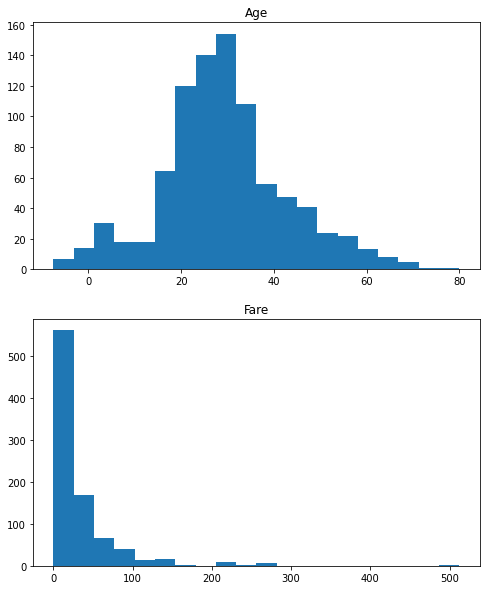

In [ ]:
# Plot das features contínuas
fig,axs = plt.subplots(2,1, figsize=(8,10))

axs[0].hist(new_df['Age'], bins=20)
axs[0].set_title('Age')
axs[1].hist(new_df['Fare'], bins=20)
axs[1].set_title('Fare')
plt.show()

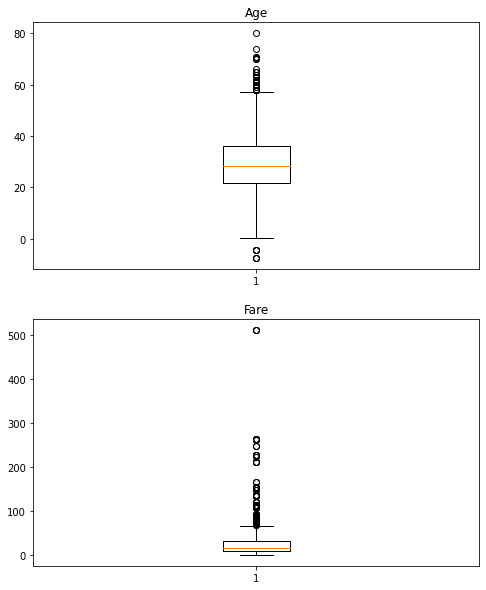

In [ ]:
# Boxplot das features contínuas
fig,axs = plt.subplots(2,1, figsize=(8,10))

axs[0].boxplot(new_df['Age'])
axs[0].set_title('Age')
axs[1].boxplot(new_df['Fare'])
axs[1].set_title('Fare')
plt.show()

In [ ]:
# Definição dos intervalos interquartil
first_quartile = np.percentile(new_df['Age'], 25)
third_quartile = np.percentile(new_df['Age'], 75)

IQR = third_quartile - first_quartile
IQR

14.426478800518602

In [ ]:
# Remoção de outliers - Não ajudou

'''
new_df.loc[new_df['Age'] < first_quartile - 1.5*IQR, 'Age'] = first_quartile - 1.5*IQR
new_df.loc[new_df['Age'] > first_quartile + 1.5*IQR, 'Age'] = third_quartile + 1.5*IQR

new_df_test.loc[new_df_test['Age'] < first_quartile - 1.5*IQR, 'Age'] = first_quartile - 1.5*IQR
new_df_test.loc[new_df_test['Age'] > first_quartile + 1.5*IQR, 'Age'] = third_quartile + 1.5*IQR 
'''

"\nnew_df.loc[new_df['Age'] < first_quartile - 1.5*IQR, 'Age'] = first_quartile - 1.5*IQR\nnew_df.loc[new_df['Age'] > first_quartile + 1.5*IQR, 'Age'] = third_quartile + 1.5*IQR\n\nnew_df_test.loc[new_df_test['Age'] < first_quartile - 1.5*IQR, 'Age'] = first_quartile - 1.5*IQR\nnew_df_test.loc[new_df_test['Age'] > first_quartile + 1.5*IQR, 'Age'] = third_quartile + 1.5*IQR \n"

In [ ]:
# Valorez são padronizados
X = new_df.iloc[:,:].values

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
# Divisão dos dados entre treino e teste 

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# Classificação usando naive-bayes
from sklearn.svm import SVC
classifier = SVC(kernel='rbf')

classifier.fit(X_train, y_train)
predictions = classifier.predict(X_val)

In [ ]:
# Métricas de avaliação
from sklearn.metrics import confusion_matrix, accuracy_score,f1_score,precision_score,recall_score
accuracy = accuracy_score(y_val, predictions)
f1 = f1_score(y_val, predictions)
precision = precision_score(y_val, predictions)
recall = recall_score(y_val, predictions)

In [ ]:
print(f'Metrics:\nF1: {f1}\nAccuracy: {accuracy}\nPrecision:{precision}\nRecall: {recall}')

Metrics:
F1: 0.7244094488188977
Accuracy: 0.8044692737430168
Precision:0.7931034482758621
Recall: 0.6666666666666666


In [ ]:
classifier_svm = classifier

In [ ]:
!pip install catboost

In [ ]:
from catboost import CatBoostClassifier
classifier = CatBoostClassifier(
    iterations=20, 
    learning_rate=0.1, 
    depth=4
)

In [ ]:
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_val)

accuracy = accuracy_score(y_val, predictions)
f1 = f1_score(y_val, predictions)
precision = precision_score(y_val, predictions)
recall = recall_score(y_val, predictions)

print(f'Metrics:\nF1: {f1}\nAccuracy: {accuracy}\nPrecision:{precision}\nRecall: {recall}')

0:	learn: 0.6567635	total: 684us	remaining: 13ms
1:	learn: 0.6249558	total: 1.18ms	remaining: 10.6ms
2:	learn: 0.6036978	total: 1.6ms	remaining: 9.08ms
3:	learn: 0.5824759	total: 2.2ms	remaining: 8.8ms
4:	learn: 0.5641679	total: 2.81ms	remaining: 8.42ms
5:	learn: 0.5480406	total: 3.43ms	remaining: 7.99ms
6:	learn: 0.5329268	total: 4.05ms	remaining: 7.52ms
7:	learn: 0.5199305	total: 4.65ms	remaining: 6.97ms
8:	learn: 0.5080181	total: 5.26ms	remaining: 6.43ms
9:	learn: 0.4975796	total: 5.89ms	remaining: 5.89ms
10:	learn: 0.4902399	total: 6.49ms	remaining: 5.31ms
11:	learn: 0.4827217	total: 7.09ms	remaining: 4.73ms
12:	learn: 0.4755101	total: 7.68ms	remaining: 4.13ms
13:	learn: 0.4674688	total: 8.3ms	remaining: 3.56ms
14:	learn: 0.4617322	total: 8.91ms	remaining: 2.97ms
15:	learn: 0.4569844	total: 9.53ms	remaining: 2.38ms
16:	learn: 0.4532445	total: 10.2ms	remaining: 1.8ms
17:	learn: 0.4492467	total: 10.8ms	remaining: 1.2ms
18:	learn: 0.4443720	total: 11.4ms	remaining: 600us
19:	learn: 0.

In [ ]:
# Substituição de valores nulos
fare_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
df_test['Fare'] = fare_mean.fit_transform(df_test['Fare'].values.reshape(-1,1))[:,0]

In [ ]:
# Predição e padronização dos valores de teste
X_test = new_df_test.iloc[:,:]
X_test = scaler.fit_transform(X_test)

predictions_test = classifier.predict(X_test)
predictions_test

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
# Criação do dataframe de output
output = pd.DataFrame()
output['PassengerId'] = test_ids
output['Survived'] = predictions_test
output.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [ ]:
output_csv = output.to_csv('output.csv',index=False)